In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
np.random.seed(10)

/home/kadran1/mambaforge/envs/testenv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [300]:
# all parameters for generating the time series should be configured in this cell
time = 100
nchannels = 2
dims = 1
effects = {
    "Pulse": {
        "channel":[0,1, 0, 2],
        "index":[50, 10, 15, 70],
        "scale":[3, -5, 2, 1.5]
        },
    "Trend": {
        "channel":[2, 1],
        "index":[20, 50],
        "slope":[2, -1.5]
        }
    }
mu = [15, 20, 50]
cov = np.diag([3, 2, 5])

In [301]:
class Gen():
    def __init__(self, time, nchannels= 2, dims = 1, effects = effects, mu = mu, cov = cov):              
        # get the parameters
        self.n = nchannels
        self.dims = dims
        self.effects = effects
        self.mu = mu
        self.cov = cov
        
        # generate the time axis
        self.t = np.arange(time, step = 0.2)        
        l = self.t.shape[0]
        
        # generate the different timeseries: multivariate normal dist
        self.x = np.random.multivariate_normal(self.mu, self.cov, l).T

        # add effects (noise)
        self.add_effects(self.effects)            
    
    #plots the generated data
    def show(self):        
        plt.plot(self.t, self.x.T)
#         plt.plot(self.trend.T * [1,-1], label="trend")
#         plt.plot(self.y.T, label="y")
#         plt.legend()
        plt.grid(True)
        
    #returns the Time series and their parameters
    def parameters(self):        
        params = {
            "T": self.t,
            "nchannels":self.n,
            "effects":self.effects,
            "mu":self.mu,
            "cov":self.cov
        }
        return self.x, params
    
    # loops through all the input effects and calls the respective function for each effect
    def add_effects(self, effects):        
        if self.effects is not None:
            for effect, params in self.effects.items(): 
                if effect == "Pulse":
                    self.add_pulse(params)
                
                if effect == "Trend":
                    self.add_trend(params)
    
    # adds a pulse effect
    def add_pulse(self, params):
        # extract the parameters:
            # channel: On which channel will the effect be applied.
            # index: At which index will the effect be applied.
            # scale: How strong is the Pulse. 
        channel = params["channel"]
        idx = np.array([np.where(t == idx) for idx in params["index"] ]).squeeze()
        scale = params["scale"]
        
        # generate the pulse
        ground_val = self.x[channel, idx]
        k = np.random.uniform(ground_val, ground_val*scale)

        # add it to the channel
        self.x[channel,idx] += k
        

    
    def add_trend(self, params):
        # extract the parameters:
            # channel: On which channel will the effect be applied.
            # index: At which index will the effect be applied.
            # slope: define the slope of the shift. 
        channels = params["channel"]
        idx = params["index"]
        idx = np.array([np.where(t == idx) for idx in params["index"] ]).squeeze()
        slope = params["slope"]

        # generate the shift
        trends = np.zeros_like(self.x[channels,:])
        for channel, idx in enumerate(idxs):
            n = len(t) - idx
            print(n)
            print(trends.shape)
            trends[channel, idx :] = np.linspace(0,  slope[channel]* 0.2*n, n)

        # add it to the channel
        self.x[channels,:] += trends
#     def add_trend(self, params):
#         # extract the parameters:
#             # channel: On which channel will the effect be applied.
#             # index: At which index will the effect be applied.
#             # slope: define the slope of the shift. 
#         channel = params["channel"]
#         idx = params["index"]
#         slope = params["slope"]
        
#         new_t = np.tile(self.t, (len(channel),1))
#         print(new_t.shape)
#         # generate the shift
#         linear = self.linear(new_t, np.abs(slope), idx)
#         print(linear.shape)
#         self.trend = self.ReLu(linear)
        
#         print(self.trend.shape)
        
# #         self.trend *= np.sign(slope)
#         # add it to the channel
#         self.x[:,channel] += self.trend.T * np.sign(slope)
        
#     def ReLu(self, x):
#         return(np.maximum(0, x))
    
#     def linear(self, x, a, b):
#         return (x.T*a - b).T

In [302]:
X = Gen(time)
x, params = X.parameters()

400
(2, 500)
250
(2, 500)


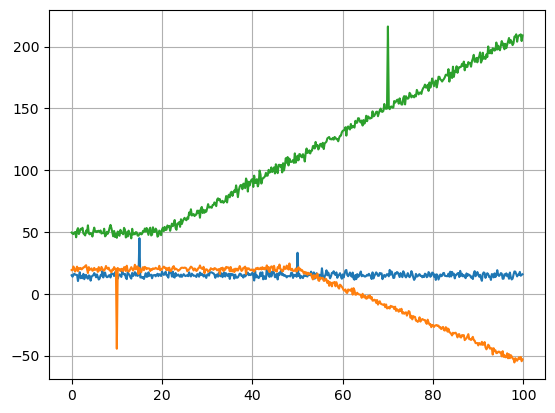

In [303]:
X.show()

In [268]:
def add_trend(params):
        # extract the parameters:
            # channel: On which channel will the effect be applied.
            # index: At which index will the effect be applied.
            # slope: define the slope of the shift. 
        channels = params["channel"]
        idx = params["index"]
        idx = np.array([np.where(t == idx) for idx in params["index"] ]).squeeze()
        slope = params["slope"]

        # generate the shift
        trends = np.zeros_like(x[channels,:])
        for channel, idx in enumerate(idxs):
            n = len(t) - idx
            trends[channel, idx :] = np.linspace(0,  slope[channel]* 0.2*n, n)

        # add it to the channel
        x[channels,:] += trends

In [269]:
effects = {
    "Trend": {
        "channel":[2, 1],
        "index":[20, 50],
        "slope":[1, -1]
        }
    }
time = 100
mu = [15, 20, 50]
cov = np.diag([1, 0.5, 3])

# generate the time axis
t = np.arange(time, step = 0.2)        
l = t.shape[0]

# generate the different timeseries: multivariate normal dist
x = np.random.multivariate_normal(mu, cov, l).T
x.shape

(3, 500)

[2, 1]
[100 250]
[1, -1]
(2, 500)
(2, 500)
(2, 500)


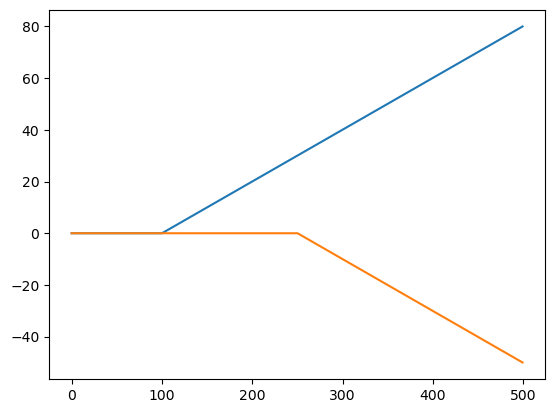

In [270]:
add_trend(effects["Trend"])

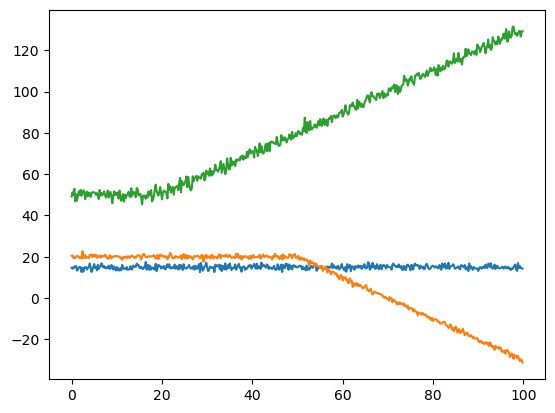

In [272]:
plt.plot(t, x.T)